<a href="https://colab.research.google.com/github/BartekPodgorski/Python/blob/main/data-science-training/06_scikit_learn/09_Support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
sns.set()

In [4]:
digits = datasets.load_digits()

In [5]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [6]:
images = digits.images
labels = digits.target
print(images.shape)
print(labels.shape)

(1797, 8, 8)
(1797,)


In [7]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

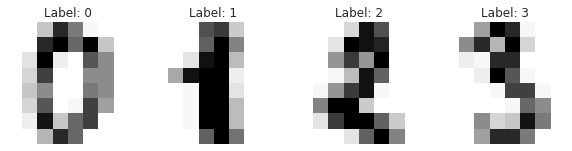

In [10]:
plt.figure(figsize=(10, 10))
for index, (image, label) in enumerate(list(zip(images, labels))[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title('Label: {}'.format(index, label))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(images,labels)

X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [13]:
X_train[0]

array([ 0.,  0.,  2., 14., 15.,  5.,  0.,  0.,  0.,  0., 10., 16., 16.,
       15.,  1.,  0.,  0.,  3., 16., 10., 10., 16.,  4.,  0.,  0.,  5.,
       16.,  0.,  0., 14.,  6.,  0.,  0.,  5., 16.,  6.,  0., 12.,  7.,
        0.,  0.,  1., 15., 13.,  4., 13.,  6.,  0.,  0.,  0., 11., 16.,
       16., 15.,  0.,  0.,  0.,  0.,  2., 11., 13.,  4.,  0.,  0.])

In [14]:
y_train[0]

0

In [15]:
from sklearn.svm import SVC

classifier = SVC(gamma=0.001)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.94      1.00      0.97        46
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        52
           4       0.98      1.00      0.99        46
           5       1.00      0.96      0.98        48
           6       1.00      0.98      0.99        53
           7       1.00      0.98      0.99        46
           8       0.95      0.93      0.94        42
           9       0.93      0.97      0.95        38

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [20]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[38,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  1],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 37]])

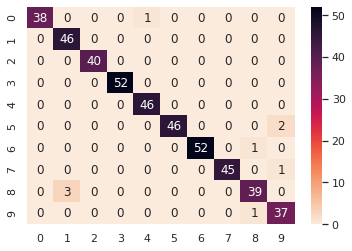

In [21]:
_ = sns.heatmap(cm, annot=True, cmap=sns.cm.rocket_r)

In [22]:
columns = ['pred_' + str(i) for i in range(10)]
index = ['true_' + str(i) for i in range(10)]

def plot_confusion_matrix(cm):

    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=columns, index=index[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=700, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [23]:
results = pd.DataFrame(data={'y_pred': y_pred, 'y_test': y_test})
results.head(10)

,y_pred,y_test
0,5,5
1,7,7
2,1,1
3,5,5
4,4,4
5,5,5
6,2,2
7,4,4
8,9,9
9,0,0


In [24]:
errors = results[results['y_pred'] != results['y_test']]
errors_idxs = list(errors.index)
errors_idxs

[15, 40, 148, 180, 231, 240, 269, 317, 430]

In [25]:
results.loc[errors_idxs, :]

,y_pred,y_test
15,9,5
40,9,5
148,9,7
180,1,8
231,8,6
240,8,9
269,1,8
317,4,0
430,1,8


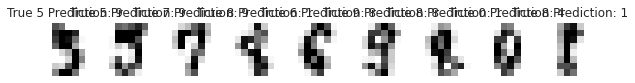

In [28]:
plt.figure(figsize=(10, 10))
for idx, error_idx in enumerate(errors_idxs[:len(errors_idxs)]):
    image = X_test[error_idx].reshape(8, 8)
    plt.subplot(2, len(errors_idxs), idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f"True {results.loc[error_idx, 'y_test']} Prediction: {results.loc[error_idx, 'y_pred']}")